In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io
import pandas as pd

In [2]:
paviaU = scipy.io.loadmat('./PaviaU.mat')['paviaU']
paviaU_gt = scipy.io.loadmat('./PaviaU_gt.mat')['paviaU_gt']

In [3]:
paviaU.shape

(610, 340, 103)

In [4]:
from sklearn.decomposition import PCA

In [5]:
paviaU.max()

8000

In [6]:
Nmax = paviaU.max()
paviaU = paviaU/Nmax

In [7]:
paviaU = paviaU.reshape(610*340, 103)

In [8]:
pca = PCA(3)
paviaU_PCA = pca.fit_transform(paviaU)

In [9]:
paviaU_PCA = paviaU_PCA.reshape((610,340,3))

In [10]:
paviaU.shape

(207400, 103)

In [11]:
for i in range(3):
    paviaU_PCA[:,:,i] = (paviaU_PCA[:,:,i]-paviaU_PCA[:,:,i].min())/(paviaU_PCA[:,:,i].max()-paviaU_PCA[:,:,i].min())
    paviaU_PCA[:,:,i] = paviaU_PCA[:,:,i]*255
paviaU_PCA = paviaU_PCA.astype(np.uint8)

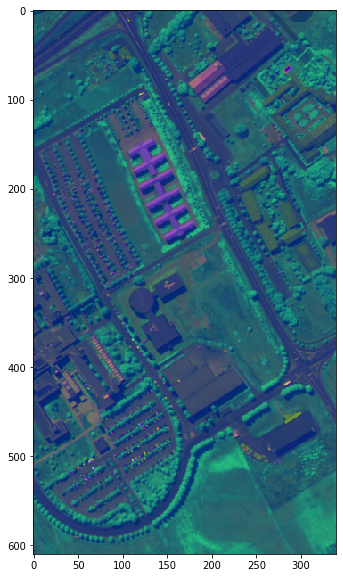

In [12]:
plt.figure(figsize=(20,10))
plt.imshow(paviaU_PCA)

In [13]:
from PIL import Image
im = Image.fromarray(paviaU_PCA.astype(np.uint8))
im.save('./final5-3bandMin.png')

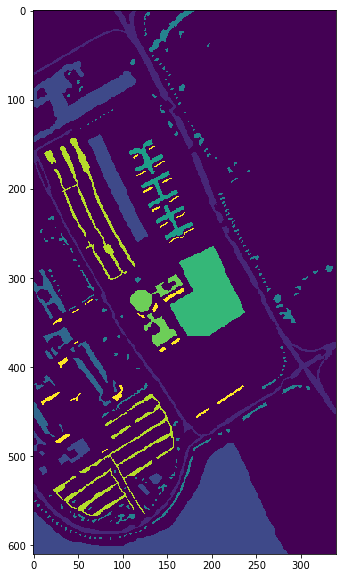

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(paviaU_gt)

In [15]:
n_class,num_pre_class = np.unique(paviaU_gt.reshape((610*340)), return_counts=True)

In [16]:
pca2 = PCA(50)
paviaU_PCA2 = pca2.fit_transform(paviaU)

In [17]:
df = pd.DataFrame(paviaU_PCA2,paviaU_gt.reshape(610*340))
df = df.sample(frac=1)
df = df.sort_index()
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.077705,0.112573,-0.109386,-0.008017,0.034491,0.004647,0.041844,-0.035740,-0.015160,-0.003544,...,-0.005762,0.000121,7.810265e-07,0.001862,-0.001465,0.000407,-0.002986,0.000137,0.004313,-0.002167
0,-0.021751,0.234935,-0.139975,-0.027378,-0.025231,0.055090,0.003648,0.045710,-0.030729,-0.016798,...,-0.003360,-0.000140,-2.517937e-03,-0.000430,0.002077,0.000499,-0.001259,-0.001804,0.000471,0.001932
0,-0.508752,0.414721,0.068266,0.037138,0.004612,-0.048506,-0.015655,0.029129,0.009265,0.014908,...,-0.001208,-0.000068,-2.855766e-03,0.000976,-0.001090,-0.001184,0.000162,-0.000950,-0.000017,0.003559
0,-0.350025,0.588581,0.090911,0.014744,0.009751,-0.003193,-0.007740,-0.048214,-0.010606,-0.000832,...,-0.002760,-0.002005,-2.251972e-03,0.000109,-0.001408,-0.001206,0.001753,-0.000646,0.003983,-0.001725
0,-0.375667,0.511066,0.068900,0.025055,0.004418,-0.010216,-0.051733,0.006883,0.011628,-0.014651,...,0.001632,0.001715,-1.754128e-03,-0.001060,0.001190,0.000225,-0.000844,0.000837,0.006638,0.003258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,-1.301405,-0.893416,0.062761,-0.028604,0.012813,-0.021613,0.018830,0.012349,0.027978,0.033035,...,-0.000772,0.004350,3.423721e-03,0.000429,-0.001114,0.000340,-0.000698,-0.002441,-0.000575,0.000690
9,-1.121703,-0.962571,0.108718,-0.006551,-0.015839,0.007318,-0.004684,0.003301,-0.009479,0.007965,...,-0.001086,-0.000898,1.336791e-04,0.002496,-0.003493,0.000673,-0.001445,-0.003304,-0.001613,-0.003837
9,-1.114957,-1.003754,0.139304,0.028724,-0.033919,0.008989,-0.015622,0.001063,0.001837,0.008398,...,-0.000092,-0.001411,3.133022e-03,0.002154,0.000082,0.001199,0.001066,0.001000,-0.001317,0.000124
9,-1.330066,-0.991290,0.075910,-0.001924,0.004462,-0.011796,0.017644,-0.004325,0.021994,0.031760,...,-0.000254,0.000175,-2.389978e-03,-0.004410,0.000759,0.002290,0.002644,0.000963,-0.004667,0.000627


In [18]:
n_class,num_pre_class

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([164624,   6631,  18649,   2099,   3064,   1345,   5029,   1330,
          3682,    947], dtype=int64))

In [19]:
ttc = np.floor(num_pre_class/10).astype(int)

In [20]:
X_train = np.concatenate((df.iloc[0:ttc[0]],
                          df.iloc[num_pre_class[:1].sum():num_pre_class[:1].sum()+ttc[1]],
                          df.iloc[num_pre_class[:2].sum():num_pre_class[:2].sum()+ttc[2]],
                         df.iloc[num_pre_class[:3].sum():num_pre_class[:3].sum()+ttc[3]],
                         df.iloc[num_pre_class[:4].sum():num_pre_class[:4].sum()+ttc[4]],
                         df.iloc[num_pre_class[:5].sum():num_pre_class[:5].sum()+ttc[5]],
                         df.iloc[num_pre_class[:6].sum():num_pre_class[:6].sum()+ttc[6]],
                         df.iloc[num_pre_class[:7].sum():num_pre_class[:7].sum()+ttc[7]],
                         df.iloc[num_pre_class[:8].sum():num_pre_class[:8].sum()+ttc[8]],
                         df.iloc[num_pre_class[:9].sum():num_pre_class[:9].sum()+ttc[9]]))

y_train = np.concatenate(( np.zeros(ttc[0]) ,
                        np.ones(ttc[1]),
                        np.ones(ttc[2])*2,
                        np.ones(ttc[3])*3,
                        np.ones(ttc[4])*4,
                        np.ones(ttc[5])*5,
                        np.ones(ttc[6])*6,
                        np.ones(ttc[7])*7,
                        np.ones(ttc[8])*8,
                        np.ones(ttc[9])*9,))

X_test = np.concatenate((df.iloc[ttc[0]:num_pre_class[:1].sum()],
                        df.iloc[num_pre_class[:1].sum()+ttc[1]:num_pre_class[:2].sum()],
                        df.iloc[num_pre_class[:2].sum()+ttc[2]:num_pre_class[:3].sum()],
                        df.iloc[num_pre_class[:3].sum()+ttc[3]:num_pre_class[:4].sum()],
                        df.iloc[num_pre_class[:4].sum()+ttc[4]:num_pre_class[:5].sum()],
                        df.iloc[num_pre_class[:5].sum()+ttc[5]:num_pre_class[:6].sum()],
                        df.iloc[num_pre_class[:6].sum()+ttc[6]:num_pre_class[:7].sum()],
                        df.iloc[num_pre_class[:7].sum()+ttc[7]:num_pre_class[:8].sum()],
                        df.iloc[num_pre_class[:8].sum()+ttc[8]:num_pre_class[:9].sum()],
                        df.iloc[num_pre_class[:9].sum()+ttc[9]:]))
y_test = np.concatenate(( np.zeros(num_pre_class[0]-ttc[0]) ,
                        np.ones(num_pre_class[1]-ttc[1]),
                        np.ones(num_pre_class[2]-ttc[2])*2,
                        np.ones(num_pre_class[3]-ttc[3])*3,
                        np.ones(num_pre_class[4]-ttc[4])*4,
                        np.ones(num_pre_class[5]-ttc[5])*5,
                        np.ones(num_pre_class[6]-ttc[6])*6,
                        np.ones(num_pre_class[7]-ttc[7])*7,
                        np.ones(num_pre_class[8]-ttc[8])*8,
                        np.ones(num_pre_class[9]-ttc[9])*9,))


In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20735, 50)
(20735,)
(186665, 50)
(186665,)


In [22]:
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train = y_train[idx]
idx = np.random.permutation(len(X_test))
X_test = X_test[idx]
y_test = y_test[idx]


In [23]:
from tensorflow import keras

C:\Users\Lay\Anaconda3\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lay\Anaconda3\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lay\Anaconda3\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lay\Anaconda3\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [24]:
y_train_encode = keras.utils.to_categorical(y_train)
y_test_encode = keras.utils.to_categorical(y_test)

In [25]:
def nnmodel(input_shape):
    X_input = keras.layers.Input((input_shape))
    #X = keras.layers.Dense(1024,activation='relu')(X_input)
    X = keras.layers.Dense(2048)(X_input)
    X = keras.layers.LeakyReLU(alpha=0.3)(X)
    X = keras.layers.Dense(512)(X)
    X = keras.layers.LeakyReLU(alpha=0.3)(X)
    X = keras.layers.Dense(256)(X)
    X = keras.layers.LeakyReLU(alpha=0.3)(X)
    X = keras.layers.Dense(10,activation='softmax')(X)
    model = keras.models.Model(inputs=X_input, outputs=X, name='model')
    return model

In [26]:
mymodel = nnmodel(X_train[0].shape)
mymodel.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
mymodel.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 2048)              104448    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
leak

In [27]:
mymodel.fit(X_train,y_train_encode,batch_size=32,epochs=20,validation_data=(X_test[:200],y_test_encode[:200]))

Train on 20735 samples, validate on 200 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
20735/20735 [==============================] - 4s 206us/sample - loss: 0.6312 - acc: 0.7941 - val_loss: 0.6608 - val_acc: 0.7650
Epoch 2/20
20735/20735 [==============================] - 4s 181us/sample - loss: 0.4950 - acc: 0.8084 - val_loss: 0.5558 - val_acc: 0.7550
Epoch 3/20
20735/20735 [==============================] - 4s 181us/sample - loss: 0.4575 - acc: 0.8162 - val_loss: 0.4994 - val_acc: 0.7950
Epoch 4/20
20735/20735 [==============================] - 4s 186us/sample - loss: 0.4276 - acc: 0.8249 - val_loss: 0.4860 - val_acc: 0.8000
Epoch 5/20
20735/20735 [==============================] - 4s 177us/sample - loss: 0.4103 - acc: 0.8303 - val_loss: 0.4983 - val_acc: 0.8050
Epoch 6/20
20735/20735 [==============================] - 4s 181us/sample - loss: 0.3970 - acc: 0.8347 - val_loss: 0.4493 - val_acc: 0.8100
Epoch 7/20
20735/20735 [==============================] - 4s 181

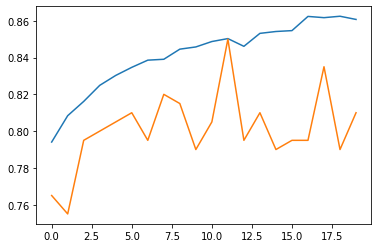

In [28]:
his = mymodel.history.history
plt.plot(his['acc'])
plt.plot(his['val_acc'])

In [29]:
from sklearn.metrics import confusion_matrix,cohen_kappa_score,classification_report

In [30]:
print(mymodel.evaluate(X_test,y_test_encode))

186665/186665 [==============================] - 8s 45us/sample - loss: 0.3652 - acc: 0.8486
[0.36523170419622286, 0.8485951]


In [31]:
pred = mymodel.predict(X_test)

In [32]:
print(classification_report(y_test,np.argmax(pred,axis=1)))

C:\Users\Lay\Anaconda3\envs\ai\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91    148162
         1.0       0.67      0.17      0.27      5968
         2.0       0.79      0.63      0.70     16785
         3.0       0.39      0.52      0.44      1890
         4.0       0.65      0.20      0.31      2758
         5.0       0.74      0.98      0.84      1211
         6.0       0.55      0.57      0.56      4527
         7.0       0.71      0.62      0.66      1197
         8.0       0.49      0.50      0.50      3314
         9.0       0.00      0.00      0.00       853

    accuracy                           0.85    186665
   macro avg       0.59      0.51      0.52    186665
weighted avg       0.84      0.85      0.84    186665



In [33]:
conMat = confusion_matrix(y_test,np.argmax(pred,axis=1))
print(conMat)

[[139013    509   2765   1325    297    424   1998    255   1576      0]
 [  4897   1022      0      3      0      0      0     39      7      0]
 [  6050      0  10658      0      0      0     76      0      1      0]
 [   791      2      0    983      0      0      0      1    113      0]
 [  2196      0      0      0    562      0      0      0      0      0]
 [    27      0      0      0      0   1184      0      0      0      0]
 [  1877      0     70      0      0      0   2580      0      0      0]
 [   452      1      0      0      0      0      0    744      0      0]
 [  1437      0      1    217      0      0      0      2   1657      0]
 [   853      0      0      0      0      0      0      0      0      0]]


In [34]:
overall_acc = (conMat*np.eye(len(conMat))).sum()/conMat.sum()
overall_acc

0.8485950767417566

In [35]:
cohen_kappa_score(y_test,np.argmax(pred,axis=1))

0.5296575821622584

In [36]:
lcm = mymodel.predict(paviaU_PCA2)

In [38]:
lcm = np.argmax(lcm,axis=1)

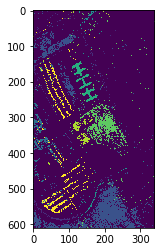

In [47]:
plt.imshow(lcm.reshape(610, 340).astype(np.uint8))

In [48]:
from PIL import Image
im = Image.fromarray(lcm.reshape(610, 340).astype(np.uint8))
im.save('./final5-lcm.png')

In [45]:
lcm.asty

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)